In [1]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

In [2]:
image = mx.image.imread('C:/Users/Khantipu/source/repos/GluonCV/dog_and_cycle.jpg')

In [3]:
print('type:', type(image))
print('shape:', image.shape)
print('datatype:', image.dtype)
print('minimum value:', image.min().asscalar())
print('maximum value:', image.max().asscalar())

type: <class 'mxnet.ndarray.ndarray.NDArray'>
shape: (1600, 2560, 3)
datatype: <class 'numpy.uint8'>
minimum value: 0
maximum value: 255


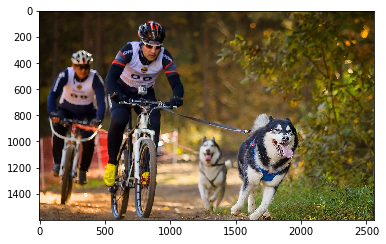

In [4]:
plt.imshow(image.asnumpy())

In [5]:
image, chw_image = gcv.data.transforms.presets.yolo.transform_test(image, short=512)

In [6]:
print('shape:', image.shape)
print('datatype:', image.dtype)
print('minimum value:', image.min().asscalar())
print('maximum value:', image.max().asscalar())

shape: (1, 3, 512, 819)
datatype: <class 'numpy.float32'>
minimum value: -2.117904
maximum value: 2.64


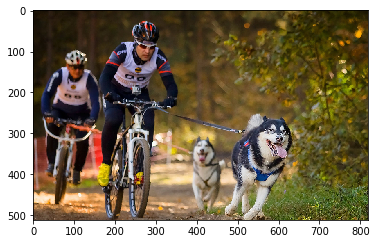

In [7]:
plt.imshow(chw_image)

In [8]:
network = gcv.model_zoo.get_model('yolo3_darknet53_coco', pretrained = True)

100%|██████████| 224190/224190 [09:15<00:00, 403.53KB/s]


In [9]:
prediction = network(image)

In [10]:
type(prediction)

tuple

In [11]:
for index, array in enumerate(prediction):
    print('#{} shape: {}'.format(index+1, array.shape))

#1 shape: (1, 100, 1)
#2 shape: (1, 100, 1)
#3 shape: (1, 100, 4)


In [12]:
prediction = [array[0] for array in prediction]

In [13]:
class_indicies, probabilities, bounding_boxes = prediction

In [14]:
k = 10
print(class_indicies[:k])


[[ 0.]
 [ 0.]
 [ 1.]
 [16.]
 [16.]
 [ 1.]
 [ 3.]
 [ 0.]
 [ 1.]
 [-1.]]
<NDArray 10x1 @cpu(0)>


In [15]:
class_index = 16
print(network.classes[class_index])

dog


In [16]:
print(probabilities[:k])


[[ 0.9856126 ]
 [ 0.985117  ]
 [ 0.9757382 ]
 [ 0.9697283 ]
 [ 0.88361776]
 [ 0.6800302 ]
 [ 0.04768753]
 [ 0.02396991]
 [ 0.01838439]
 [-1.        ]]
<NDArray 10x1 @cpu(0)>


In [17]:
print(bounding_boxes[:k])


[[152.42142   26.974411 350.705    453.36133 ]
 [ 18.464828  90.562836 168.96655  438.42484 ]
 [161.79047  208.71365  328.11188  506.1071  ]
 [471.0412   250.25342  638.2896   505.28223 ]
 [388.59277  309.64896  459.95984  495.04556 ]
 [ 31.002937 267.88858  146.51147  472.26785 ]
 [ 31.002937 267.88858  146.51147  472.26785 ]
 [ 85.36219  261.4148   153.61053  424.71027 ]
 [ 47.296318 280.76495  100.633064 469.58344 ]
 [ -1.        -1.        -1.        -1.      ]]
<NDArray 10x4 @cpu(0)>


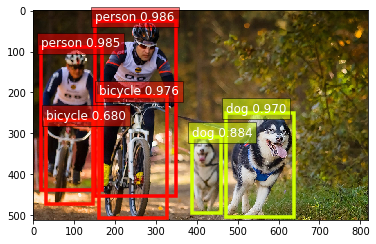

In [19]:
gcv.utils.viz.plot_bbox(chw_image,
                       bounding_boxes,
                       probabilities,
                       class_indicies,
                       class_names=network.classes)